In [2]:
from manim import *
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [3]:
computer = SVGMobject(
    "./figures/computer.svg",
    stroke_color=WHITE,
    color=WHITE,
    fill_color=WHITE,
    opacity=1,
    stroke_width=0.01,
)
product_calc = SVGMobject(
    "./figures/product_calc.svg",
    stroke_color=WHITE,
    color=WHITE,
    fill_color=WHITE,
    opacity=1,
    stroke_width=0.01,
)
bp_filter = SVGMobject(
    "./figures/filter.svg",
    stroke_color=WHITE,
    color=WHITE,
    fill_color=WHITE,
    opacity=1,
    stroke_width=0.01,
)
window_function = SVGMobject(
    "./figures/window_function.svg",
    stroke_color=WHITE,
    color=WHITE,
    fill_color=WHITE,
    opacity=1,
    stroke_width=0.01,
)
adc = SVGMobject(
    "./figures/adc.svg",
    stroke_color=WHITE,
    color=WHITE,
    fill_color=WHITE,
    opacity=1,
    stroke_width=0.01,
)
range_norm = SVGMobject(
    "./figures/range_norm.svg",
    stroke_color=WHITE,
    color=WHITE,
    fill_color=WHITE,
    opacity=1,
    stroke_width=0.01,
)

In [6]:
blocks = [adc, window_function, bp_filter, range_norm, product_calc, computer]
coords = np.array(
    [
block.get_right()
        for block in blocks
    ]
)
coords[:2]

array([[[-1.32111473,  0.        ,  0.        ],
        [ 1.32111473,  0.        ,  0.        ],
        [ 3.82111473,  0.        ,  0.        ]],

       [[-1.        ,  0.        ,  0.        ],
        [ 1.        ,  0.        ,  0.        ],
        [ 3.5       ,  0.        ,  0.        ]]])

In [16]:
coords[:, 1].cumsum(axis=0)  # + RIGHT * 2.5

array([[1.32111473, 0.        , 0.        ],
       [2.32111473, 0.        , 0.        ],
       [3.32111473, 0.        , 0.        ],
       [4.32111473, 0.        , 0.        ],
       [5.32111473, 0.        , 0.        ],
       [6.2924689 , 0.        , 0.        ]])

In [2]:
import matplotlib.pyplot as plt

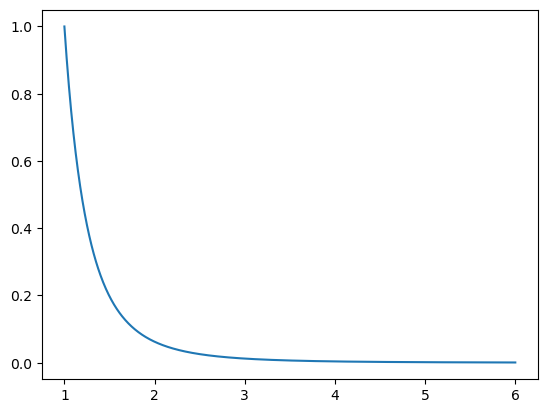

In [8]:
R = np.linspace(1, 6, 1000)
plt.plot(R, 1 / (R**4))

In [10]:
f_A = 16
f_0 = 2
A = 1

triangular_f_eqn = (
    lambda t: f_A * (signal.sawtooth(2 * PI * t, width=0.5) + 1) / 2 + f_0
)
triangular_amp_eqn = lambda t: A * np.sin(2 * PI * triangular_f_eqn(t) * t)

In [11]:
x_max = 1
x_len = 11
y_len = 2.5
step = 0.001

t = np.arange(0, x_max, step=0.001)
f = f_A * (signal.sawtooth(2 * PI * t, width=0.5) + 1) / 2 + f_0
a = A * np.sin(2 * PI * triangular_f_eqn(t) * t)
a2 = A * np.sin(2 * PI * f)  # * t)

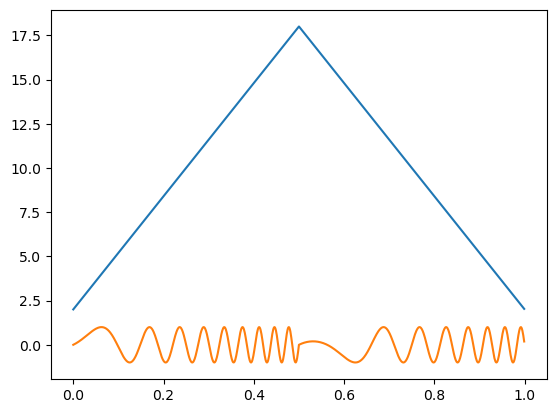

In [19]:
plt.plot(t, f)
plt.plot(t, a)

In [22]:
f[::20]

array([ 2.  ,  2.64,  3.28,  3.92,  4.56,  5.2 ,  5.84,  6.48,  7.12,
        7.76,  8.4 ,  9.04,  9.68, 10.32, 10.96, 11.6 , 12.24, 12.88,
       13.52, 14.16, 14.8 , 15.44, 16.08, 16.72, 17.36, 18.  , 17.36,
       16.72, 16.08, 15.44, 14.8 , 14.16, 13.52, 12.88, 12.24, 11.6 ,
       10.96, 10.32,  9.68,  9.04,  8.4 ,  7.76,  7.12,  6.48,  5.84,
        5.2 ,  4.56,  3.92,  3.28,  2.64])

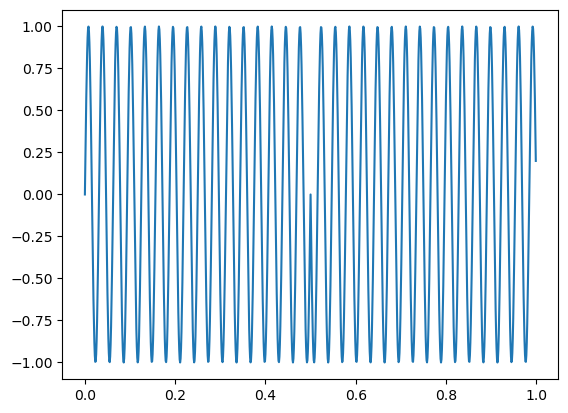

In [13]:
plt.plot(t, a2)

In [14]:
f.size // 2

500

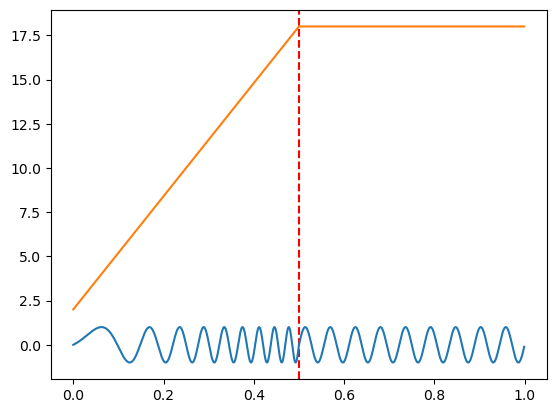

In [32]:
a3 = A * np.sin(
    2
    * PI
    * (
        np.concatenate(
            (
                f[: f.size // 2],
                np.ones(500) * 18,
                # f[f.size // 2 :][::-1],
            ),
            # (
            #     f[: f.size // 2],
            #     f[f.size // 2 :][::-1],
            # ),
            axis=None,
        )
    )
    * t
)
plt.axvline(x=0.5, c="r", linestyle="--")
plt.plot(t, a3)
plt.plot(
    t,
    np.concatenate(
        (
            f[: f.size // 2],
            np.ones(500) * 18,
        ),
        axis=None,
    ),
)

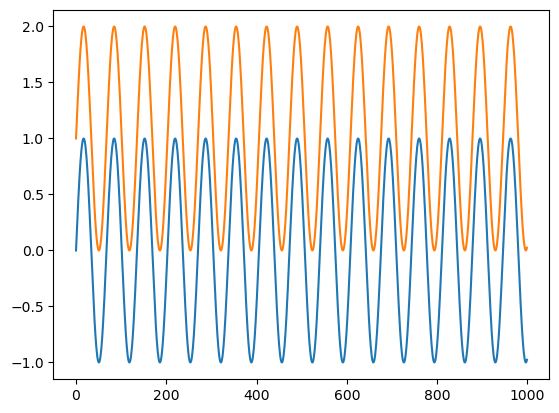

In [31]:
plt.plot(A * np.sin(2 * PI * triangular_f_eqn(0.4) * t))
plt.plot(A * np.sin(2 * PI * triangular_f_eqn(0.6) * t) + 1)

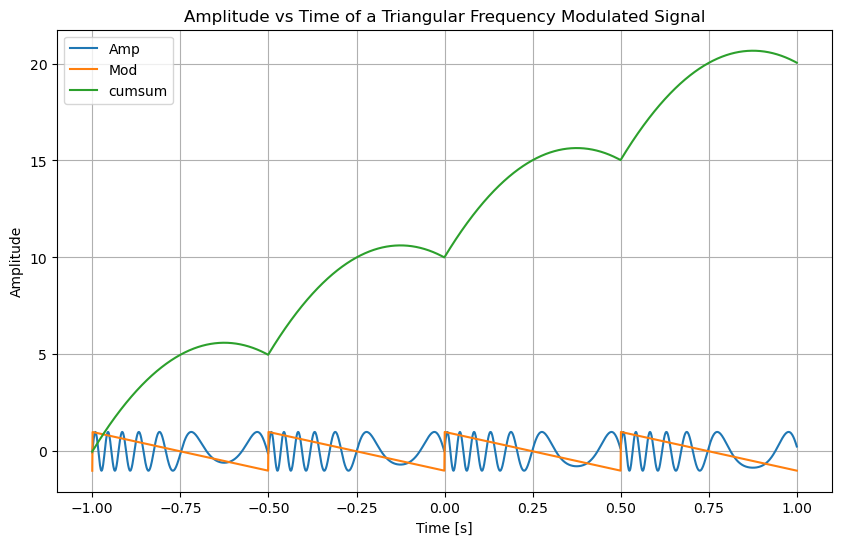

In [61]:
from scipy import signal

# Parameters
carrier_freq = 10  # Carrier frequency in Hz
modulation_freq = 0.5  # Modulation frequency in Hz
modulation_index = 20  # Modulation index
duration = 1  # Duration of the signal in seconds
sampling_rate = 1000  # Samples per second

# Time array
t = np.arange(-1, duration, 1 / sampling_rate)

# Triangular wave for frequency modulation
modulating_signal = modulation_index * np.arcsin(
    np.sin(2 * np.pi * modulation_freq * t)
)
modulating_signal = modulation_index * signal.sawtooth(2 * np.pi * 2 * -t)

# Frequency modulation
instantaneous_frequency = carrier_freq + modulating_signal

# Instantiate the FM signal using the instantaneous frequency
signal = np.sin(2 * np.pi * np.cumsum(instantaneous_frequency) / sampling_rate)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label="Amp")
plt.plot(t, modulating_signal / modulating_signal.max(), label="Mod")
plt.plot(t, np.cumsum(instantaneous_frequency) / sampling_rate, label="cumsum")
plt.title("Amplitude vs Time of a Triangular Frequency Modulated Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

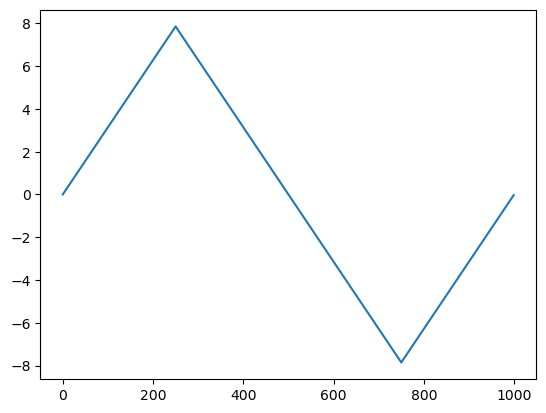

In [36]:
plt.plot(modulating_signal)

In [46]:
from scipy import signal

triangular_f_eqn = (
    lambda t: f_A * (signal.sawtooth(2 * PI * t, width=0.5) + 1) / 2 + f_0
)

In [48]:
triangular_f_eqn(np.linspace(0, 1, 1000)).sum()

9991.991991991992

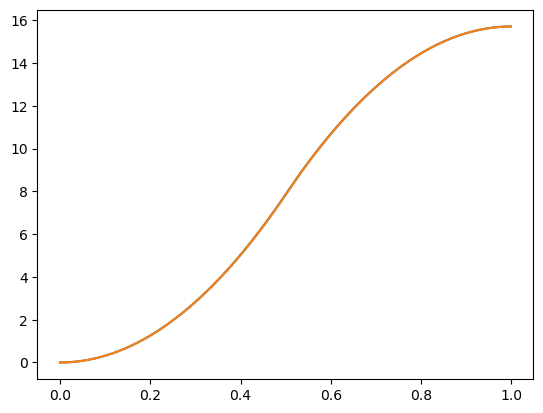

In [64]:
fs = 1000
t = np.arange(0, 1, 1 / fs)

modulating_signal_lambda = lambda t: modulation_index * np.arcsin(
    np.sin(2 * np.pi * modulation_freq * t)
)
plt.plot(t, np.cumsum(modulating_signal_lambda(t)) / fs)

values = []
for temp_t in t:
    values.append(np.sum(modulating_signal_lambda(np.arange(0, temp_t, 1 / fs))) / fs)

plt.plot(t, values)


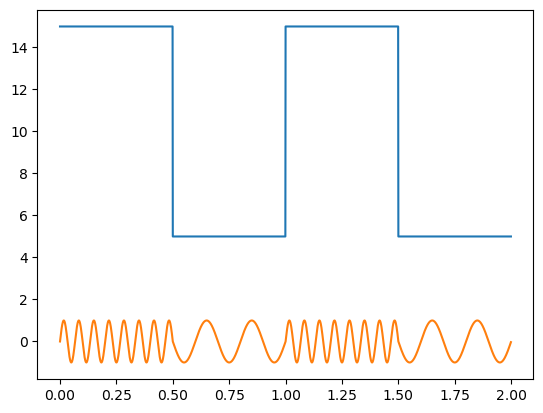

In [8]:
carrier_freq = 10
modulation_index = 5
fs = 1000
t = np.arange(0, 2, 1 / fs)
sq = modulation_index * signal.square(2 * PI * t) + carrier_freq
amp = np.sin(2 * PI * sq * t)

plt.plot(t, sq)
plt.plot(t, amp)

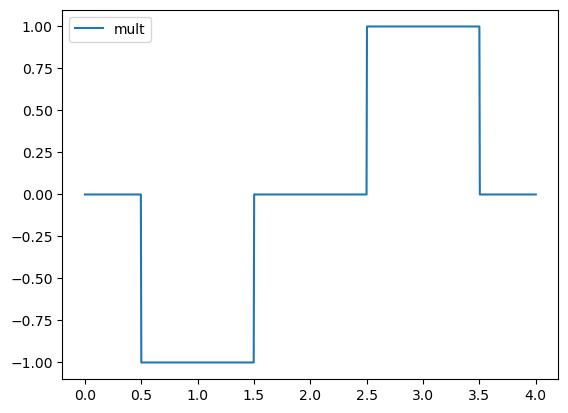

In [55]:
t = np.linspace(0, 4, 1000)


f = 0.5
shift = 2 * PI
sq = signal.square(2 * PI * f / 2 * t + shift / 2)
i = (signal.square(2 * PI * f * t - PI / 2 + shift) + 1) / 2


# plt.plot(t, sq, label="sq")
# plt.plot(t, i, label="i")
plt.plot(t, i * sq, label="mult")
plt.legend()

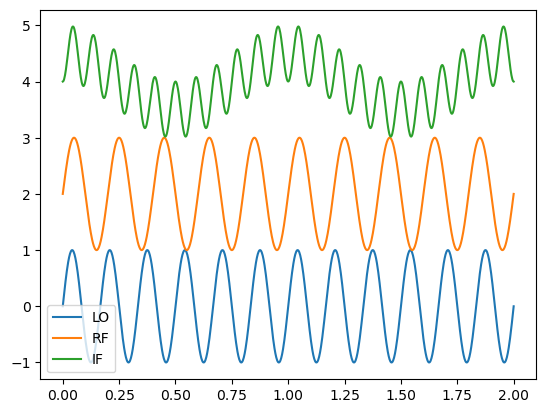

In [74]:
A = 1
t = np.linspace(0, 2, 1000)
f_tx = 6
f_rx = 5

tx_signal = A * np.sin(2 * PI * f_tx * t)
rx_signal = A * np.sin(2 * PI * f_rx * t)
if_signal = A * np.sin(2 * PI * f_tx * t) * A * np.sin(2 * PI * f_rx * t)


plt.plot(t, tx_signal, label="LO")
plt.plot(t, rx_signal + 2, label="RF")
plt.plot(t, if_signal + 4, label="IF")
plt.legend()

(-60.0, 10.0)

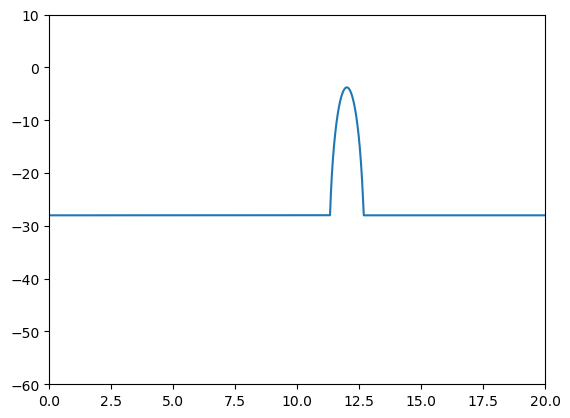

In [10]:
f_lo = 12
f_if = 2
f_rf_l = f_lo - f_if
f_rf_h = f_lo + f_if

lo_conversion_loss = 6  # dB
rf_power_relative_to_lo = 10  # dB
lo_loss = 0

stop_time = 4
fs = 1000
N = fs * stop_time
t = np.linspace(0, stop_time, N)
lo_signal = np.sin(2 * PI * f_lo * t) / (10 ** (lo_loss / 10))
if_signal = np.sin(2 * PI * f_if * t) / (10 ** ((lo_conversion_loss + lo_loss) / 10))
rf_l_signal = np.sin(2 * PI * f_rf_l * t) / (10 ** (rf_power_relative_to_lo / 10))
rf_h_signal = np.sin(2 * PI * f_rf_h * t) / (10 ** (rf_power_relative_to_lo / 10))

rf_signal = rf_l_signal + rf_h_signal

ports = [
    "lo",
    # "rf",
    # "if",
]

signals = {
    "lo": lo_signal,
    "rf_l": rf_l_signal,
    "rf_h": rf_h_signal,
    "if": if_signal,
}

summed = sum([signals.get(port) for port in ports])

blackman_window = signal.windows.blackman(N)
summed *= blackman_window

fft_len = 2**18
summed_fft = np.fft.fft(summed, fft_len) / (N / 2)
# summed_fft /= summed_fft.max()


freq = np.linspace(-fs / 2, fs / 2, fft_len)

summed_fft_log = 10 * np.log10(np.fft.fftshift(np.abs(summed_fft)))

f_max = 20
indices = np.where((freq > -f_max) & (freq < f_max))
x_values = freq[indices]
y_values = summed_fft_log[indices]
y_min = -28
y_values[y_values < y_min] = y_min

# plt.plot(freq, 10 * np.log10(np.fft.fftshift(summed_fft)))
plt.plot(x_values, y_values)
plt.xlim(0, 20)
plt.ylim(-60, 10)

In [46]:
ports = ["lo", "rf", "if"]

signals = {"lo": lo_signal, "rf": rf_signal, "if": if_signal}

sum([signals.get(port) for port in ports])

array([ 0.00000000e+00,  2.07893084e-08,  1.65851337e-07, ...,
       -1.65851337e-07, -2.07893084e-08,  2.02617352e-31])

In [37]:
x = t[69]
np.where((0.75 > t) & (t > 0.5))

(array([500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512,
        513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525,
        526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538,
        539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551,
        552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564,
        565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577,
        578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590,
        591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603,
        604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616,
        617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629,
        630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642,
        643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655,
        656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668,
        669, 670, 671, 672, 673, 674, 675, 676, 677

In [19]:
fs = 1000
f_pass = np.array([10, 12])
f_stop = np.array([9.5, 12.5])

wp = f_pass / (fs / 2)
ws = f_stop / (fs / 2)

/tmp/ipykernel_4761/1859082977.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


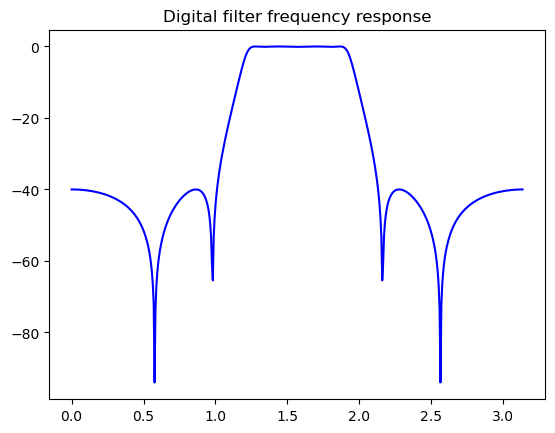

In [8]:
wp = [0.4, 0.6]
ws = [0.3, 0.7]
gpass = 0.1
gstop = 40

system = signal.iirdesign(wp, ws, gpass, gstop, ftype="ellip", analog=False)
w, h = signal.freqz(*system)

fig, ax1 = plt.subplots()
ax1.set_title("Digital filter frequency response")
ax1.plot(w, 20 * np.log10(abs(h)), "b")
fig.show()

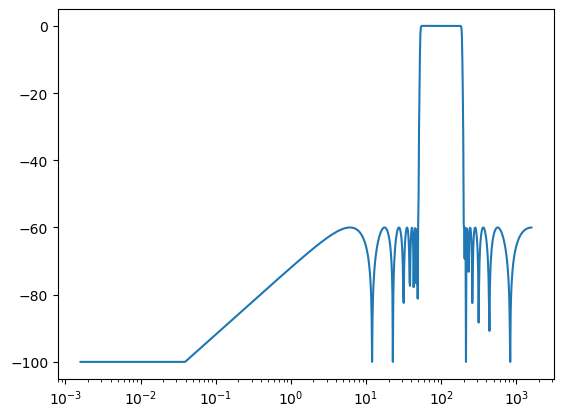

In [13]:
b, a = signal.iirfilter(
    17,
    [2 * np.pi * 50, 2 * np.pi * 200],
    rs=60,
    btype="bandpass",
    analog=True,
    ftype="cheby2",
)
w, h = signal.freqs(b, a, 1000)


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.semilogx(w / (2 * np.pi), 20 * np.log10(np.maximum(abs(h), 1e-5)))

/tmp/ipykernel_4715/3688796392.py:14: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20 * np.log10(np.abs(h)))


(-100.0, 10.0)

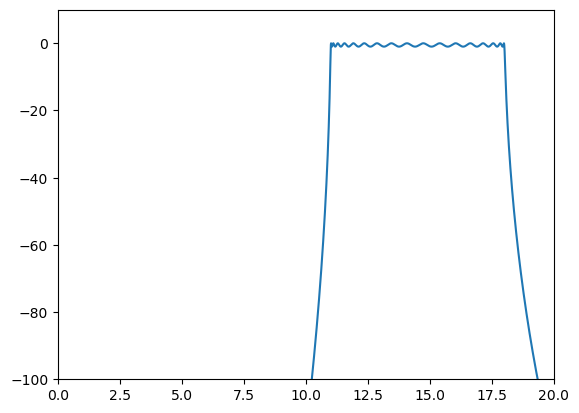

In [13]:
sos = signal.iirfilter(
    17,
    [11, 18],
    rp=1,
    rs=60,
    btype="band",
    analog=False,
    ftype="cheby1",
    fs=1000,
    output="sos",
)
w, h = signal.sosfreqz(sos, 2**18, fs=1000)

plt.plot(w, 20 * np.log10(np.abs(h)))
plt.xlim(0, 20)
plt.ylim([-100, 10])

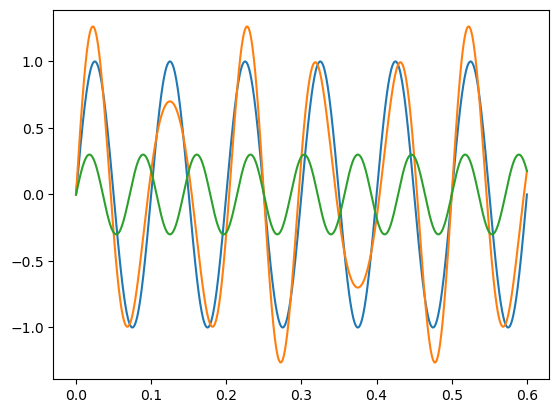

In [15]:
t = np.linspace(0, 0.6, 1000)
f_rf_l = 10
f_rf_h = 14
rf_l = np.sin(2 * PI * f_rf_l * t)
rf_h = 0.3 * np.sin(2 * PI * f_rf_h * t)

plt.plot(t, rf_l)
plt.plot(t, rf_l + rf_h)
plt.plot(t, rf_h)